# USE CASE : CUSTOMER SEGMENTATION USING CLUSTERING TECHNIQUE
Clustering is a method to find sub groups that have the same characteristics in a population. <br>
Clustering is nothing but dividing a set of data into groups of similar points or features, where data points in the same group are as similar as possible and data points in different groups are as dissimilar as possible. <br>

This  customer segmentation using clustering techniques, such as KMeans, Hierarchical, and DBSCAN, so there will be minimum number of 3 segments that represents good, medium, and bad risks.  At the end of model, choose the best clustering technique and explain why, describe each customer segments, and elaborate more on what business client/department can get benefits from this clustering model.

Before Modeling, we will perform Explatory Data Analysis (EDA) to get right visualization about which variables that suits for this customer segmentation analysis.

The original dataset contains 1000 entries with 9 attributes. In this dataset, each entry represents a person who takes a credit by a bank. The selected attributes are:

1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

**Import required libraries**

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# PERFORM EXPLORATORY DATA ANALYSIS (EDA)
**Some of this EDA have already applied on Practice Case EDA 2**

## 1. Input Dataset from Database
Read data to perform Exploratory Data Analysis by input as 'datacredit' variable

In [394]:
datacredit=pd.read_csv('german_credit_data.csv')
print(datacredit)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
5             5   35    male    1    free             NaN              NaN   
6             6   53    male    2     own      quite rich              NaN   
7             7   35    male    3    rent          little         moderate   
8             8   61    male    1     own            rich              NaN   
9             9   28    male    3     own          little         moderate   
10           10   25  female    2    rent          little         moderate   
11           11   24  female    2    rent          little       

## 2. Descriptive Attribute
Do some quick-look about data we're about to explore by run the dimension, data type, head/tail, summary statistics, etc 
to understand the data itself

In [154]:
datacredit.shape

(1000, 10)

In [155]:
print(type(datacredit))

<class 'pandas.core.frame.DataFrame'>


In [156]:
datacredit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [157]:
datacredit.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [158]:
print(datacredit.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [159]:
datacredit.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [160]:
datacredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [161]:
datacredit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## 3. Missing Value Detection
Identifying any missing values in the data before perform any analysis. It's actually depend on the purpose of the performance, but if there is any missing values, we can cleanse and prepare it by not remove it from dataframe but doing imputation. If the missing values are numerical variable, we can impute it by its median, while if the missing values are categorical variable, we can impute it by its mode.

In [395]:
#to see missing values
datacredit.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
Unnamed: 0            0
dtype: int64

We can see from the total row of data 1000, the missing values is not too large.

Because 'Unnamed : 0' columns is just like an index it can't be analyze, we can drop it from dataframe

In [396]:
datacredit=datacredit.drop(['Unnamed: 0'],axis=1)
datacredit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Because the missing values are categorical variables, we can do imputation of missing values with Mode of its columns, because it is easier to find mode in categorical variable columns.

In [397]:
categorical=['Saving accounts', 'Checking account']

for mod in categorical:
    modus=datacredit[mod].mode().values[0]
    datacredit[mod]=datacredit[mod].fillna(modus)
    
datacredit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,little,little,9055,36,education
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,little,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [398]:
#checking that all the data have no missing values anymore
datacredit.isnull().sum().sort_values(ascending=False)

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

In [399]:
datacredit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


Finally, the data 'datacredit' is ready to perform any visualization we can desire depend on the purpose.

## 4. Data Visualization : Univariate Analysis, Bivariate Analysis, Outlier Detection, and Correlation

## Outlier Detection
Outlier detection can be seen by visualize univariate analysis with some plot. <br>
At first, we need to split the data 'datacredit' into categorical data and numerical data.

In [400]:
#define numerical variables
numerical= ['Credit amount', 'Duration','Age']
numerical = datacredit[numerical]
numerical.head()

,Credit amount,Duration,Age
0,1169,6,67
1,5951,48,22
2,2096,12,49
3,7882,42,45
4,4870,24,53


In [401]:
#drop numerical variables from dataset to get the categorical variable
categorical = datacredit.drop(numerical, axis = 1)
categorical.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,little,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,little,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


In [402]:
numerical.describe()

,Credit amount,Duration,Age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [403]:
categorical.describe()

,Job
count,1000.000000
mean,1.904000
std,0.653614
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


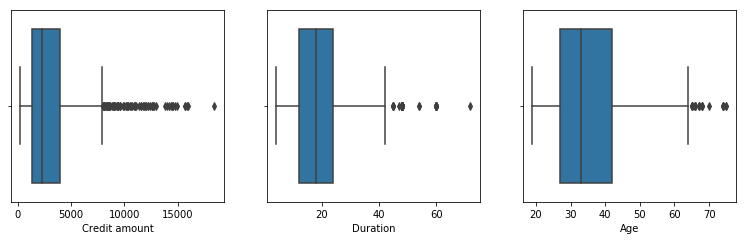

In [404]:
#define the distributin plot of each of numerical variables to see outlier
#determine the size of the figure plot
fig=plt.figure(figsize=(13,12))
axes=330
#using boxplot to visualize each numerical variables in one single loop 
for num in numerical:
    axes+=1
    fig.add_subplot(axes)
    sns.boxplot(data=numerical, x=num)

plt.show()

From the result above it can be seen that there are some outlier in numerical data 'Credit amount', 'Duration', and 'Age'.<br>
All three have tendency to positive skew of normal curve with distribution of the data tends to go right. For modelling purposes, a different approach to outliers could be to try creating a transformation of the data, either transform the value or transform the variable, such as creating a percentile version of the original field, transform the variable to create normal distribution.<br>
On this case (EDA), we will not make any transformation to data outlier. To build customer segmentation using clustering, we also will not transform the data outliers.

## Correlation
For finding correlation between numerical variables, we can use 'pearson' method. While, categoric and numerical variables, by 'spearman' method. There are two eays to find correlation in pyhton, by using 'corrwith'  or plotting with heatmap.

In [405]:
#data corellation wih each other
numerical.corrwith(numerical["Credit amount"],axis=0)

Credit amount    1.000000
Duration         0.624984
Age              0.032716
dtype: float64

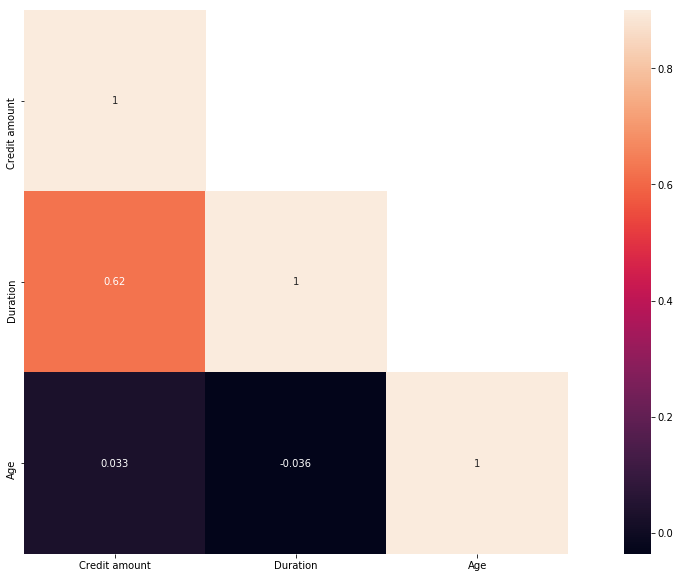

In [406]:
#create correlation with heatmap
corr = numerical.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

From the result above, it can be seen that there are correlation between variables. We can see that there's pretty high correlation between Duration and Credit Amount which is 0.62. Meanwhile the lowest correlation is between Duration and Age which is -0.036 that has negative correlation between them.

## Univariate Analysis by Plotting
To make univariate plot, we need to split based on numerical and categorical plot.

## Numerical Plot
**Distribution Plot**

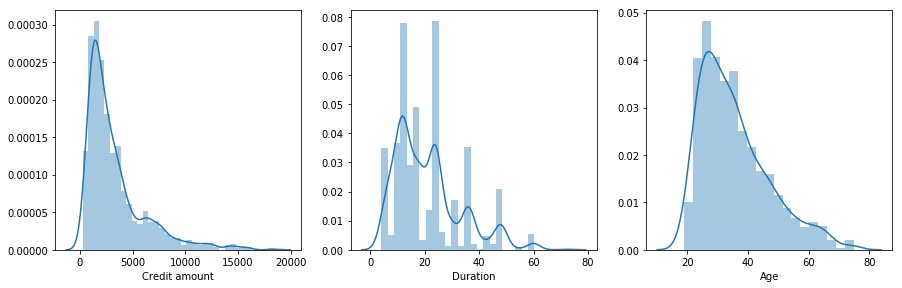

In [173]:
f=plt.figure(figsize=(15,15))
f.add_subplot(3,3,1)
sns.distplot(datacredit["Credit amount"])
f.add_subplot(3,3,2)
sns.distplot(datacredit["Duration"])
f.add_subplot(3,3,3)
sns.distplot(datacredit["Age"])

Description:
    1. From **Credit Amount** distplot, it has positive skew of normal distribution where the distribution tends to go right.   While, the distribution of customer credit amount is centered in the range between 250-5000.
    2. From **Duration** distplot, we can see the the mode value of duration credit is 12 and 24.
    3. From **Age** distplot, we can see that graphic has positive skew of normal distribution where the distribution tends to go right. While, the distribution of customer age is centered in the range between 20-40.

## Categorical Plot
**Count Plot**

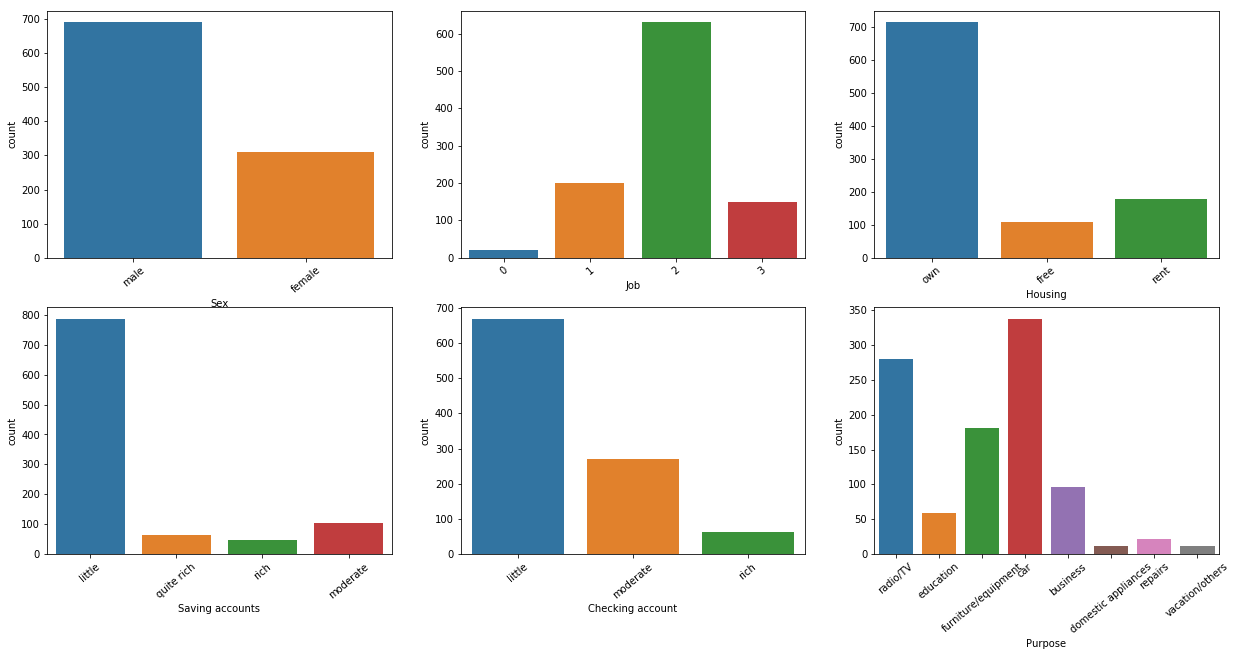

In [347]:
f = plt.figure(figsize=(21,10))
axes = 230
for num in categorical :
    axes += 1
    f.add_subplot(axes)
    sns.countplot(data = categorical, x = num)
    plt.xticks(rotation=40)
plt.show()

Description:
    1. From **Sex** countplot, we can see that there are more male customer than female customer, the male is almost 700, while female is 300.
    2. From **Job** countplot, we can see that the most customer job is 2 (skilled) and the least is 0 (unskilled and non-resident).
    3. From **Housing** countplot, we can see that most of the credit taker have their own house, while the least is have no house.
    4. From **Saving Accounts** countplot, we can see that most of the customer have little saving account, while the least is rich.
    5. From **Checking Accounts** countplot, we can see that most of the customer have little checking account, while the least is rich.
    6. From **Purpose** countplot, we can see that most of the customer spend their credit for car and the least is for domestic appliances and vacation/others.

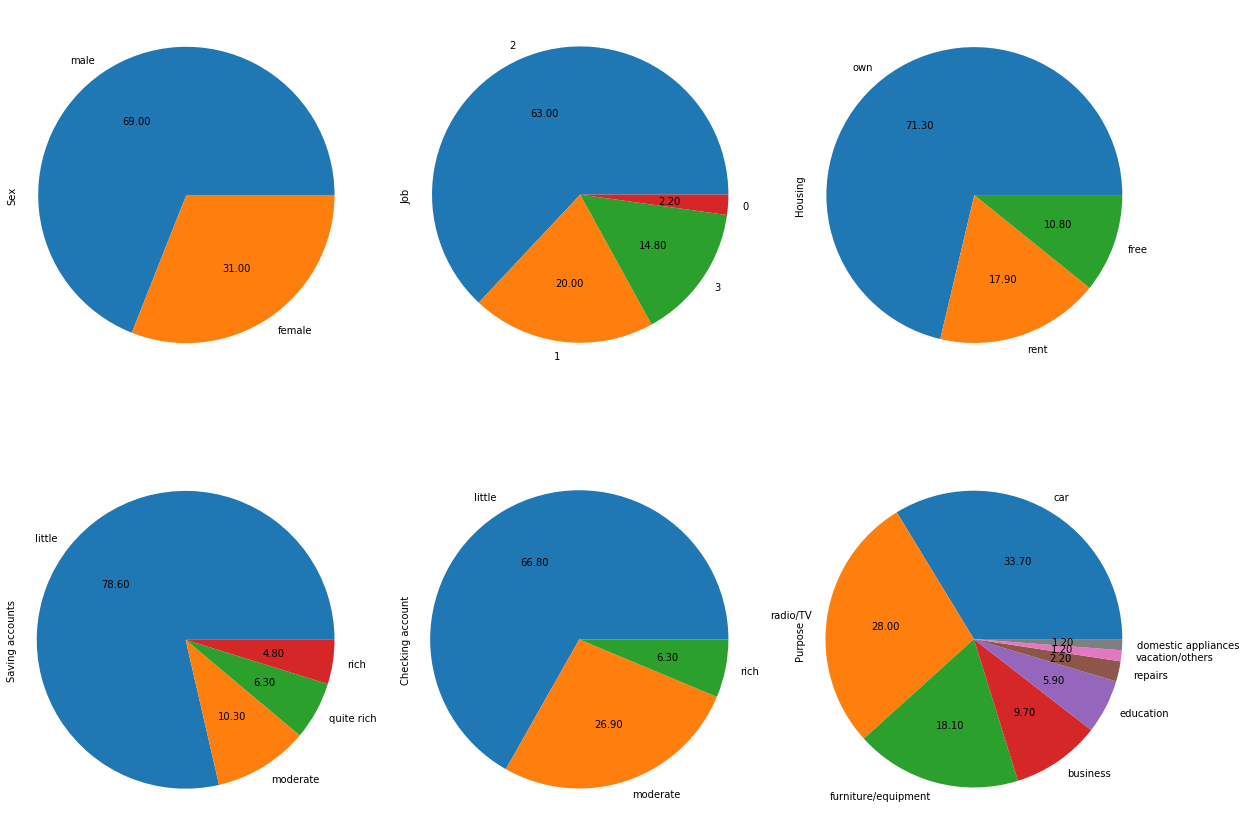

In [357]:
f = plt.figure(figsize=(20,15))
f.add_subplot(2,3,1)
categorical['Sex'].value_counts().plot.pie(autopct = '%.2f' )
plt.axis('equal')
f.add_subplot(2,3,2)
categorical['Job'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,3)
categorical['Housing'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,4)
categorical['Saving accounts'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,5)
categorical['Checking account'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,6)
categorical['Purpose'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
plt.show()

Description:
    1. From **Sex** countplot, we can see that there are male customer with 69% of all customer than female customer.
    2. From **Job** countplot, we can see that the most customer job is 2 (skilled) with 63% of all customer and the least is 0 (unskilled and non-resident) with 2.2%.
    3. From **Housing** countplot, we can see that most of the credit taker have their own house with 71.3% of all customer, while the least is have no house with 10.8%.
    4. From **Saving Accounts** countplot, we can see that most of the customer have little saving account with 78.6% of all customer, while the least is rich with 4.8%.
    5. From **Checking Accounts** countplot, we can see that most of the customer have little checking account with 66.8% of all customer, while the least is rich with 6.3%.
    6. From **Purpose** countplot, we can see that most of the customer spend their credit for car with 33.7% of all customer and the least is for domestic appliances and vacation/others with 1.2%.

## Bivariate Analysis by Plotting

## 1. Count Plot : Relationship between 2 variables 'Sex' and 'Other Categorical Variables'

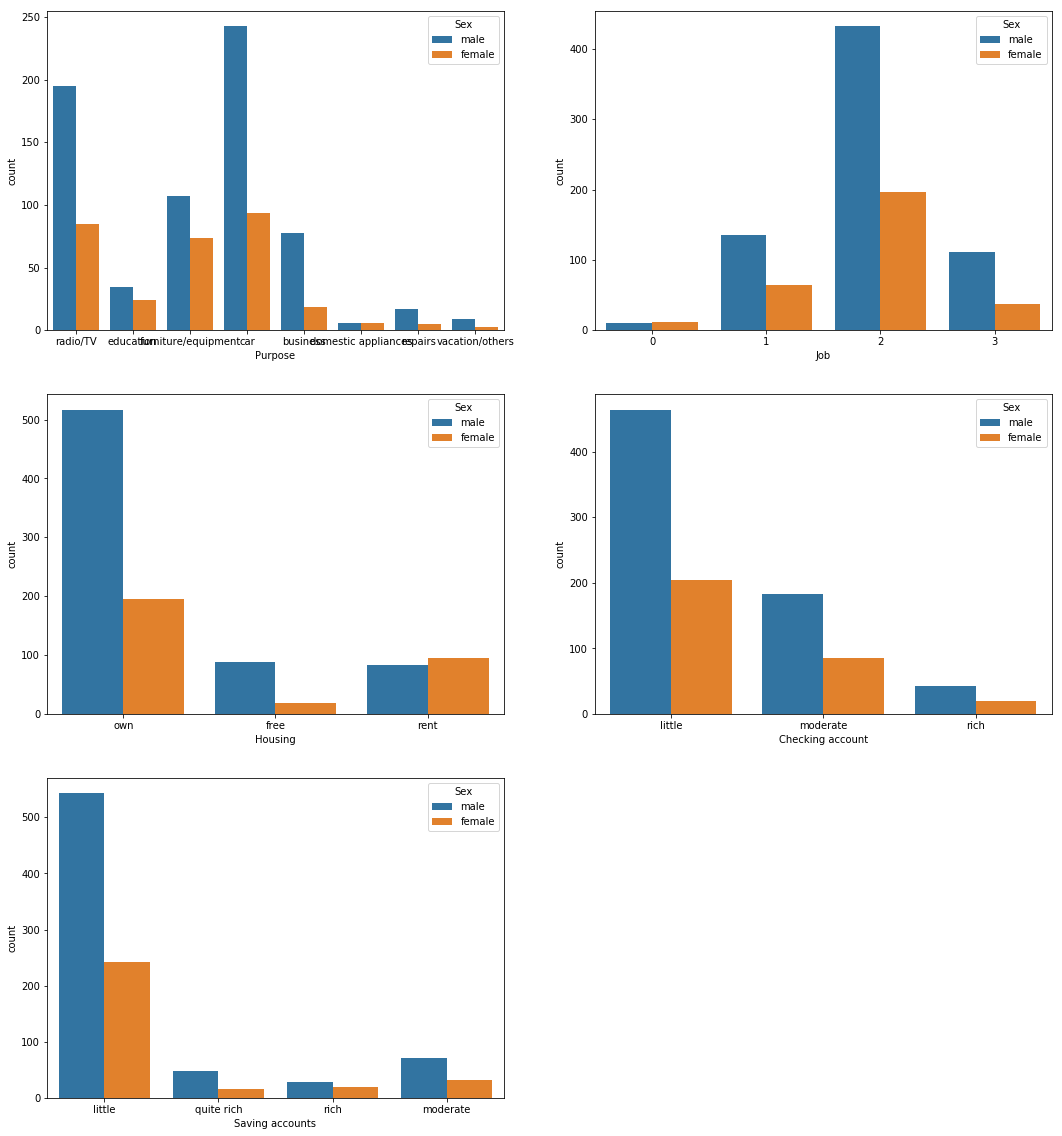

In [380]:
f = plt.figure(figsize=(18,20))
f.add_subplot(3,2,1)
sns.countplot(x="Purpose",data=categorical,hue="Sex")
f.add_subplot(3,2,2)
sns.countplot(x="Job",data=categorical,hue="Sex")
f.add_subplot(3,2,3)
sns.countplot(x="Housing",data=categorical,hue="Sex")
f.add_subplot(3,2,4)
sns.countplot(x="Checking account",data=categorical,hue="Sex")
f.add_subplot(3,2,5)
sns.countplot(x="Saving accounts",data=categorical,hue="Sex")

Description: <br>
From above count plot shows that distribution of loan purpose, loan job, loan housing, loan checking account, and loan saving account is dominated by male. But, there are some bar show that it's dominated by female, such as unskilled and non-resident job and rent house is dominated by female than male.<br>
We can see that the most eligible credit taker is dominated by male.

## 2. Scatter Plot : Relationship between 2 variables 'Credit Amount' and 'Duration'

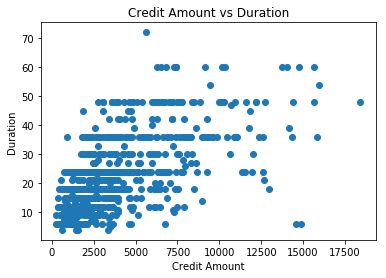

In [62]:
plt.scatter(numerical['Credit amount'],numerical['Duration'])
plt.title('Credit Amount vs Duration')
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()

We can see that most of the credit amount duration is at less than 3 years or 36 months.

## 3. Scatter Plot and Bar Plot : Relationship between 2 variables 'Credit Amount' and 'Age'

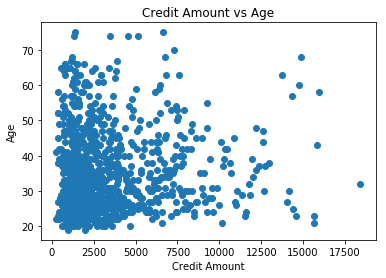

In [68]:
plt.scatter(numerical['Credit amount'],numerical['Age'])
plt.title('Credit Amount vs Age')
plt.xlabel('Credit Amount')
plt.ylabel('Age')
plt.show()

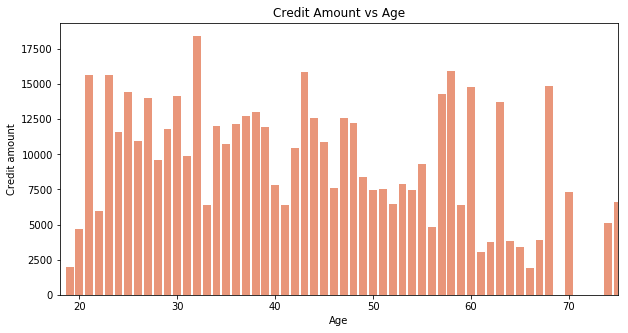

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(datacredit["Age"],datacredit["Credit amount"],color="darksalmon")
#plt.scatter(df["Purpose"],df["Credit amount"],color="g")
plt.xlabel("Age")
plt.ylabel("Credit amount")
plt.xlim(18,75)
plt.title("Credit Amount vs Age")
plt.show()

From two plots above, we can see that the most credit taker is centered at age 20-40 with amount credit is between 2000-4000.

## 4. Box Plot : Relationship between 2 variables 'Credit Amount' and 'Age'

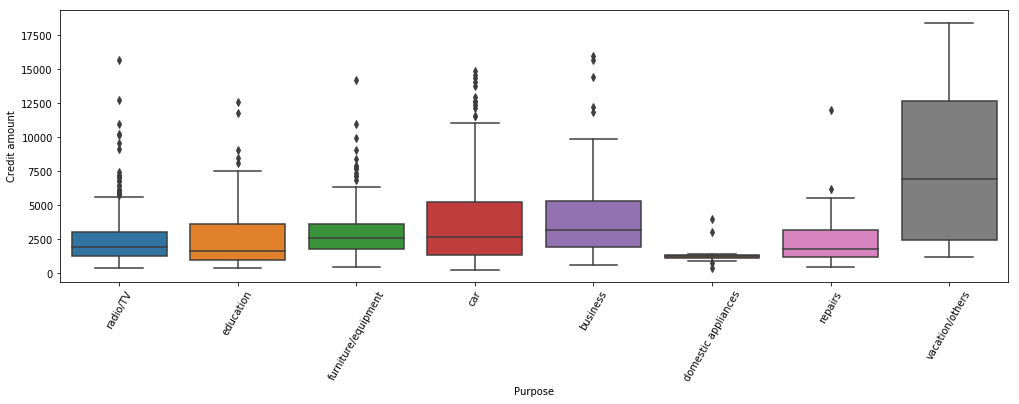

In [355]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,1,1)
sns.boxplot(y=datacredit["Credit amount"], x=datacredit['Purpose'])
plt.xticks(rotation=60)
plt.show()

We can see from box plot above, the most credit spending is for vacation/others, it can be concluded that credit takers borrow the most money used for vacation / other and the least amount of credit is for domestic appliances.

## 5. Pair Plot : Relationship between 2 variables in all dataset
To build pairplot between 2 variables for all dataset, we need to make label encoder first for all categorical variables, so it will be easier to make interpretation with pairplot.

In [416]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataencoder=datacredit.copy() #take a copy of dataframe for analysis
dataencoder.Sex=le.fit_transform(dataencoder.Sex)
dataencoder.Housing=le.fit_transform(dataencoder.Housing)
dataencoder["Saving accounts"]=le.fit_transform(dataencoder["Saving accounts"])
dataencoder["Checking account"]=le.fit_transform(dataencoder["Checking account"])
dataencoder["Purpose"]=le.fit_transform(dataencoder["Purpose"])

In [417]:
dataencoder.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [418]:
#separate categorical variables from dataencoder
categoricalencoder = ['Sex', 'Job','Housing', 'Saving accounts', 'Checking account', 'Purpose']
categoricalencoder = dataencoder[categoricalencoder]
categoricalencoder.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,1,2,1,0,0,5
1,0,2,1,0,1,5
2,1,1,1,0,0,3
3,1,2,0,0,0,4
4,1,2,0,0,0,1


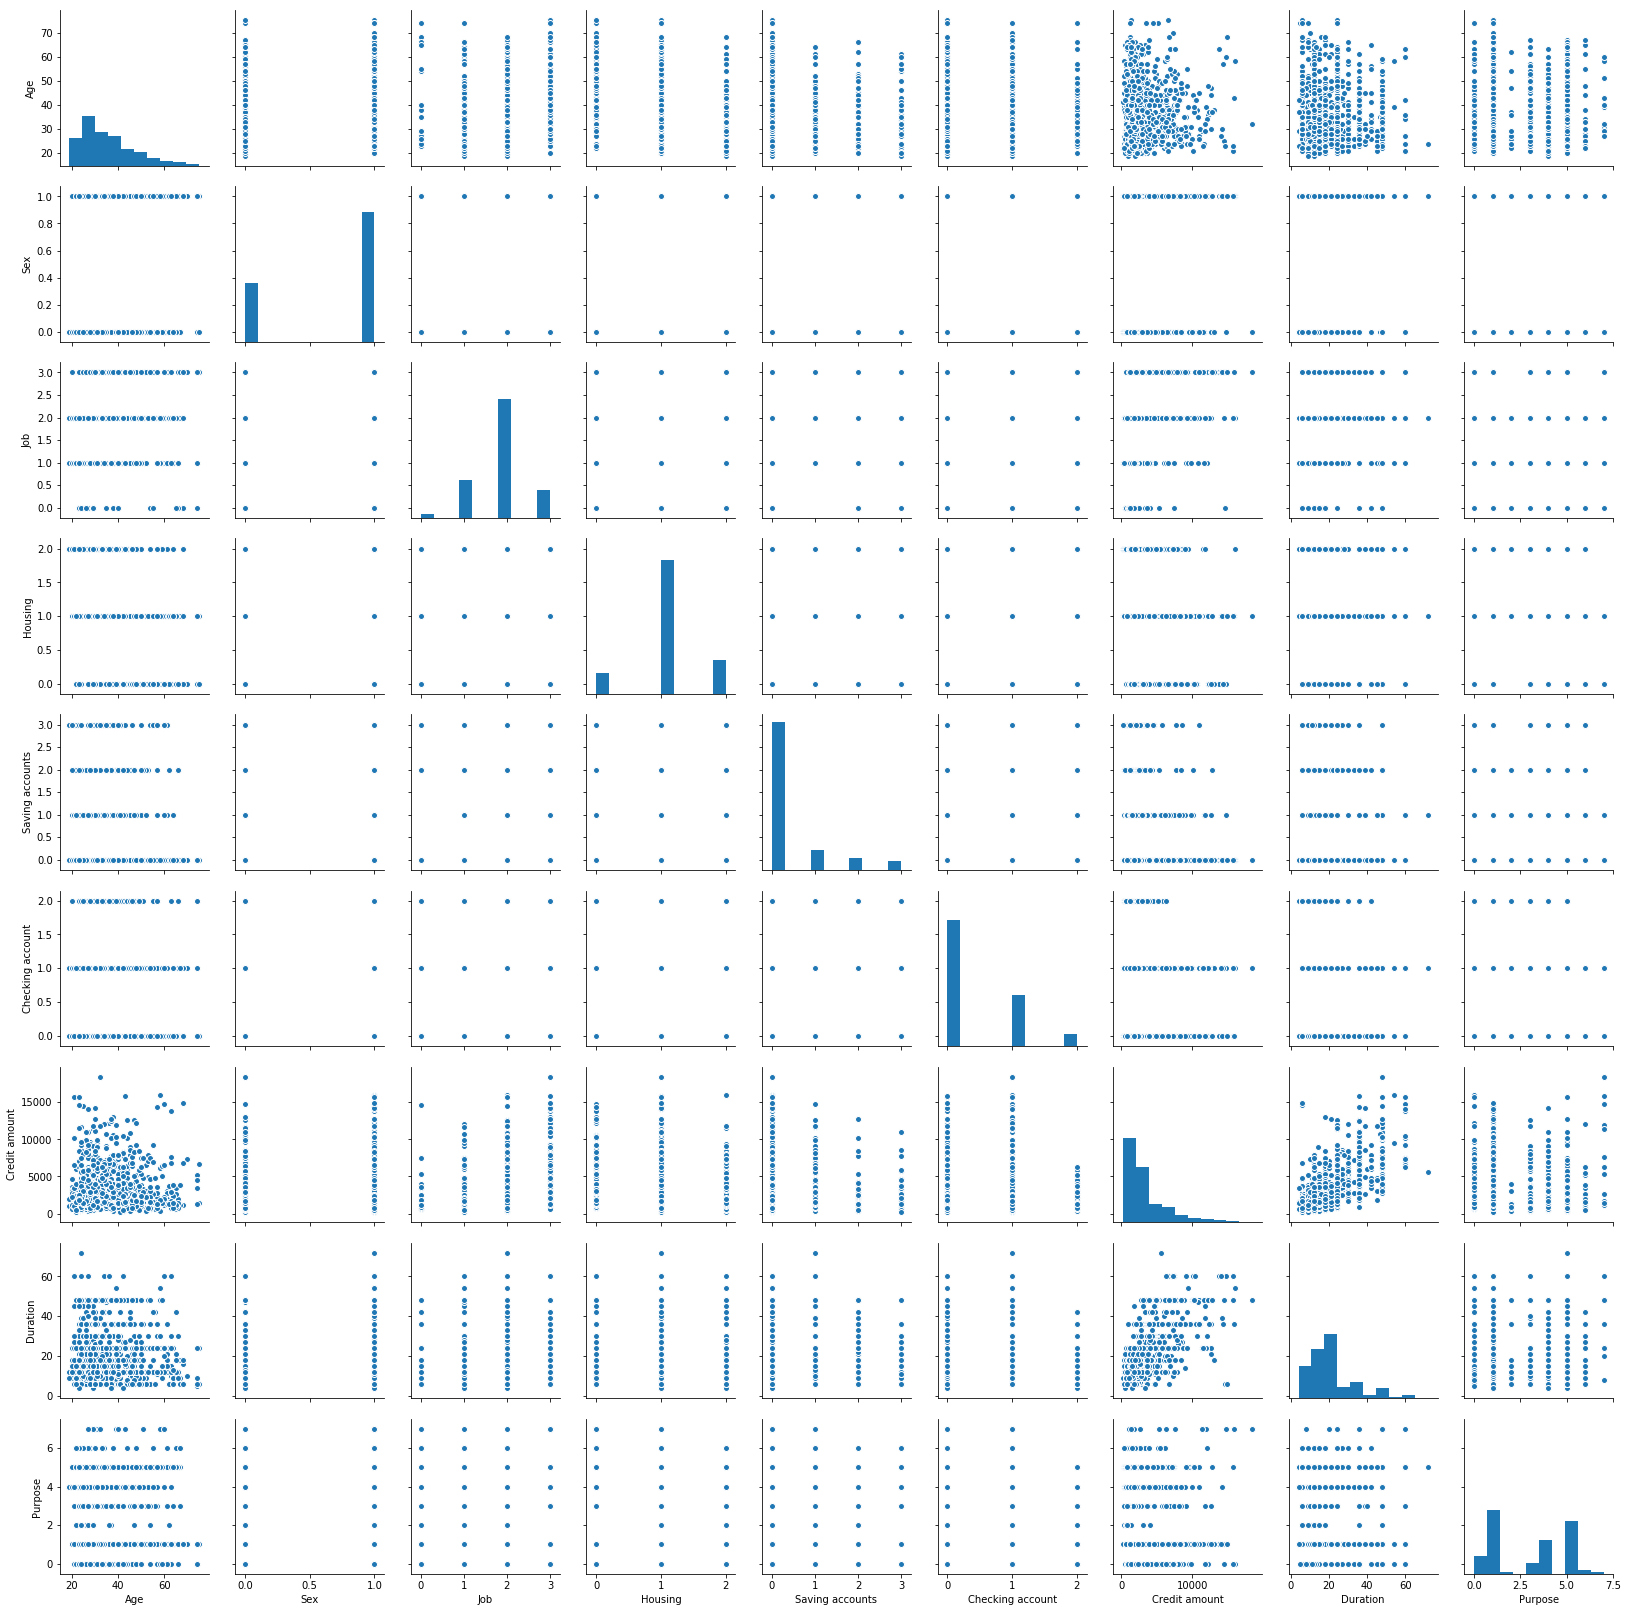

In [410]:
sns.pairplot((dataencoder), diag_kind='hist')

With this pairplot, we can see the characteristics of all variables that divided between two variables as well as to determine the possible variables to make customer segmentation and how is the correlation between variables.

# CLUSTERING TECHNIQUE


## 1. K-Means
K-means clustering is an unsupervised learning algorithm that partitions n objects into K clusters, based on the nearest mean. We need to define which K is best before building a model. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In this modeling, all variables are used because we want to get the most appropriate segmentation customer that can represent all credit taker transactions.

In [420]:
#Define variables we gonna use in the model
cluster = datacredit.copy()
cluster.Job = cluster.Job.astype(str)
cluster = cluster[['Age','Sex','Job','Housing','Saving accounts', 'Checking account', 'Credit amount', 'Duration','Purpose']]
X1 = pd.get_dummies(cluster)
X1.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,22,5951,48,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


## Scaling the data to remove disparity by normalizing.

In [303]:
#scaling the features for the model.
#minmax scaler gave score as -54 
# from sklearn.preprocessing import MinMaxScaler
# mm=MinMaxScaler()
# X=mm.fit_transform(X1)
#normalize gave score -192
from sklearn.preprocessing import normalize
X=normalize(X1)

#satandard scaler was worst
#from sklearn.preprocessing import StandardScaler
#sk=StandardScaler()
#X=sk.fit_transform(X1)

In [304]:
X

array([[0.05721921, 0.00085402, 0.00085402, ..., 0.00085402, 0.        ,
        0.        ],
       [0.00369671, 0.        , 0.00016803, ..., 0.00016803, 0.        ,
        0.        ],
       [0.02337108, 0.00047696, 0.00047696, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04720559, 0.00124225, 0.00124225, ..., 0.00124225, 0.        ,
        0.        ],
       [0.01246145, 0.0005418 , 0.        , ..., 0.0005418 , 0.        ,
        0.        ],
       [0.00589996, 0.00021852, 0.00021852, ..., 0.        , 0.        ,
        0.        ]])

## Determine K cluster before building a model

Text(0.5,1,'Elbow curve')

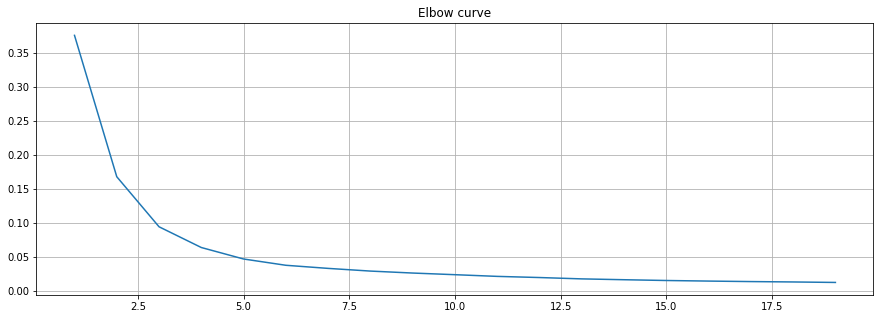

In [387]:
#By Scree Plot
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [110]:
#By SILHOUTTE

range_n_clusters = [3, 4, 5, 6]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.5790272160616248
0.48918346805437524
0.4665682555581424
0.4355426061435207


Based on Scree Plot, the number of cluster we choose is K=3 because it more aligned with the purpose of our analysis.<br>
Besides, in Silhoutte, the value of possible cluster [3,4,5,6], K=3 is the highest value, so we choose cluster K=3.

## Build a Model

In [421]:
#K-Means Activation Algorithm 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [422]:
#Print the centroid value that is generated by K-Means Algorithm. 
print(kmeans.cluster_centers_)

[[1.14194471e-02 2.38467561e-04 4.13162328e-04 1.28642853e-04
  1.40330174e-04 9.99884385e-01 7.13764416e-03 5.22478591e-06
  6.15648734e-05 2.46815812e-04 4.71361254e-05 3.69383436e-05
  1.09117303e-04 3.92005607e-06 1.49823154e-05 8.09081498e-05
  1.06373936e-04 6.84602299e-06 1.65546899e-06]
 [3.65011270e-02 6.30435707e-04 1.03628837e-03 4.21071352e-04
  4.34502575e-04 9.99177398e-01 1.26320328e-02 4.27265995e-05
  3.26622927e-04 5.53495835e-04 5.27971599e-05 4.90252208e-05
  2.99772570e-04 2.34207295e-05 1.25925999e-04 9.41317017e-05
  3.33673901e-04 4.07517363e-05 8.94066234e-06]
 [9.79897152e-02 1.16592549e-03 2.25389513e-03 1.52461268e-03
  7.04465911e-04 9.94554910e-01 1.99239187e-02 5.93300091e-05
  9.45659768e-04 1.05832492e-03 1.35525272e-20 6.77626358e-21
  7.67891971e-04 1.16239294e-04 1.16894121e-04 9.28416666e-05
  9.69447649e-04 3.38813179e-21 0.00000000e+00]]


In [423]:
#Print the Label of Cluster
print(kmeans.labels_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 2 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1 2
 0 1 1 0 0 0 0 0 1 2 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 2 0 2 0 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 2 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 2 0 1 1 0 0 0 1 0 2 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 

## Insert Cluster label to get_dummies data so it will be easier to get the visualization.

In [117]:
X2=X1.copy()
X2['Cluster']=kmeans.labels_
X2.head()

,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,67,1,1,0,0,1169,6,0,0,1,0,0,0,0,0,0,1,0,0,0
1,22,0,1,0,1,5951,48,0,0,1,0,0,0,0,0,0,1,0,0,1
2,49,1,1,0,0,2096,12,0,1,0,0,0,0,0,1,0,0,0,0,1
3,45,1,0,0,0,7882,42,0,0,1,0,0,0,0,0,1,0,0,0,1
4,53,1,0,0,0,4870,24,0,0,1,0,0,1,0,0,0,0,0,0,1


## Visualize the Clustering plot with its centroid by using Principal Component Analysis (PCA)
Because PCA can facilitate the visualization of all variables represented by n components.

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [134]:
finalresult = pd.concat([principalDf, X2], axis = 1)

In [136]:
finalresult.head()

,principal component 1,principal component 2,principal component 3,Age,Sex,Housing,Saving accounts,Checking account,Credit amount,Duration,...,Job_3,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Cluster
0,0.036341,-0.010215,-0.001138,67,1,1,0,0,1169,6,...,0,0,0,0,0,0,1,0,0,0
1,-0.015847,0.002089,0.000122,22,0,1,0,1,5951,48,...,0,0,0,0,0,0,1,0,0,1
2,0.003099,-0.003677,-0.000416,49,1,1,0,0,2096,12,...,0,0,0,0,1,0,0,0,0,1
3,-0.014357,-0.000965,0.000012,45,1,0,0,0,7882,42,...,0,0,0,0,0,1,0,0,0,1
4,-0.009339,-0.002268,-0.000127,53,1,0,0,0,4870,24,...,0,0,1,0,0,0,0,0,0,1


In [178]:
pca.explained_variance_ratio_

array([0.94459578, 0.05035168, 0.00133256])

From variance ratio of PCA above, it can be described as: <br>
    * By using 1 component, PCA can describe all variables by 94%
    * By using 2 components, PCA can describe all variables by almost 100%, and so on.
Then, it can be concluded that the visualization representation with PCA can be used because it gives fairly representative results on all variables. And from the variance ratio values, the components that can be used to represent all variables in each cluster are enough with n = 2.
    

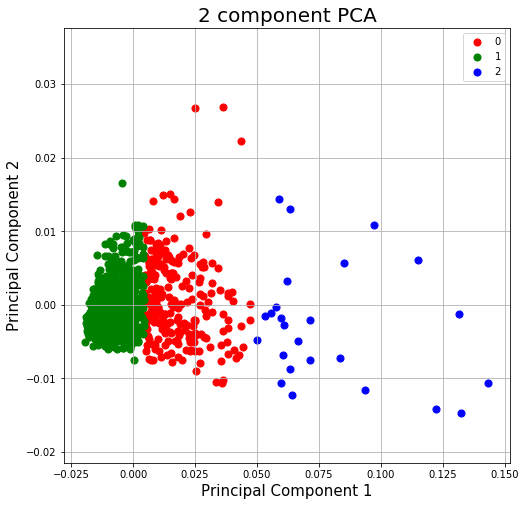

In [180]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalresult['Cluster'] == target
    ax.scatter(finalresult.loc[indicesToKeep, 'principal component 1']
               , finalresult.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

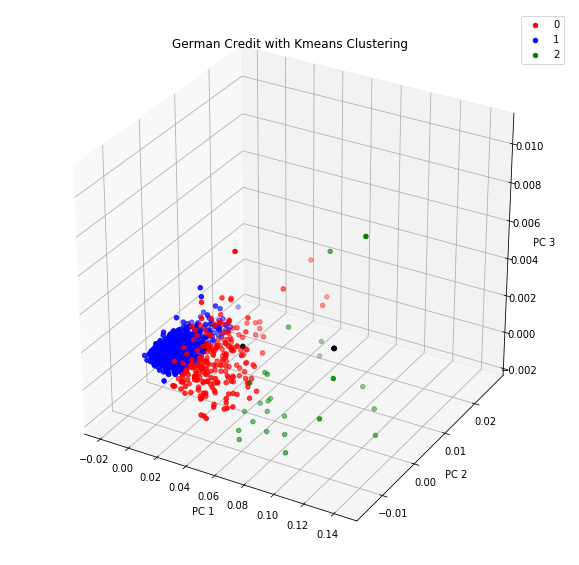

In [147]:
# Visualization of centroid
x = finalresult['principal component 1']
x1 = finalresult['principal component 2']
x2 = finalresult['principal component 3']
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("German Credit with Kmeans Clustering")
plt.show()

## Pairplot to see characteristics between 2 variables in each clusters.

In [181]:
X3=dataencoder.copy()
X3['Cluster']=kmeans.labels_
X3.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,1


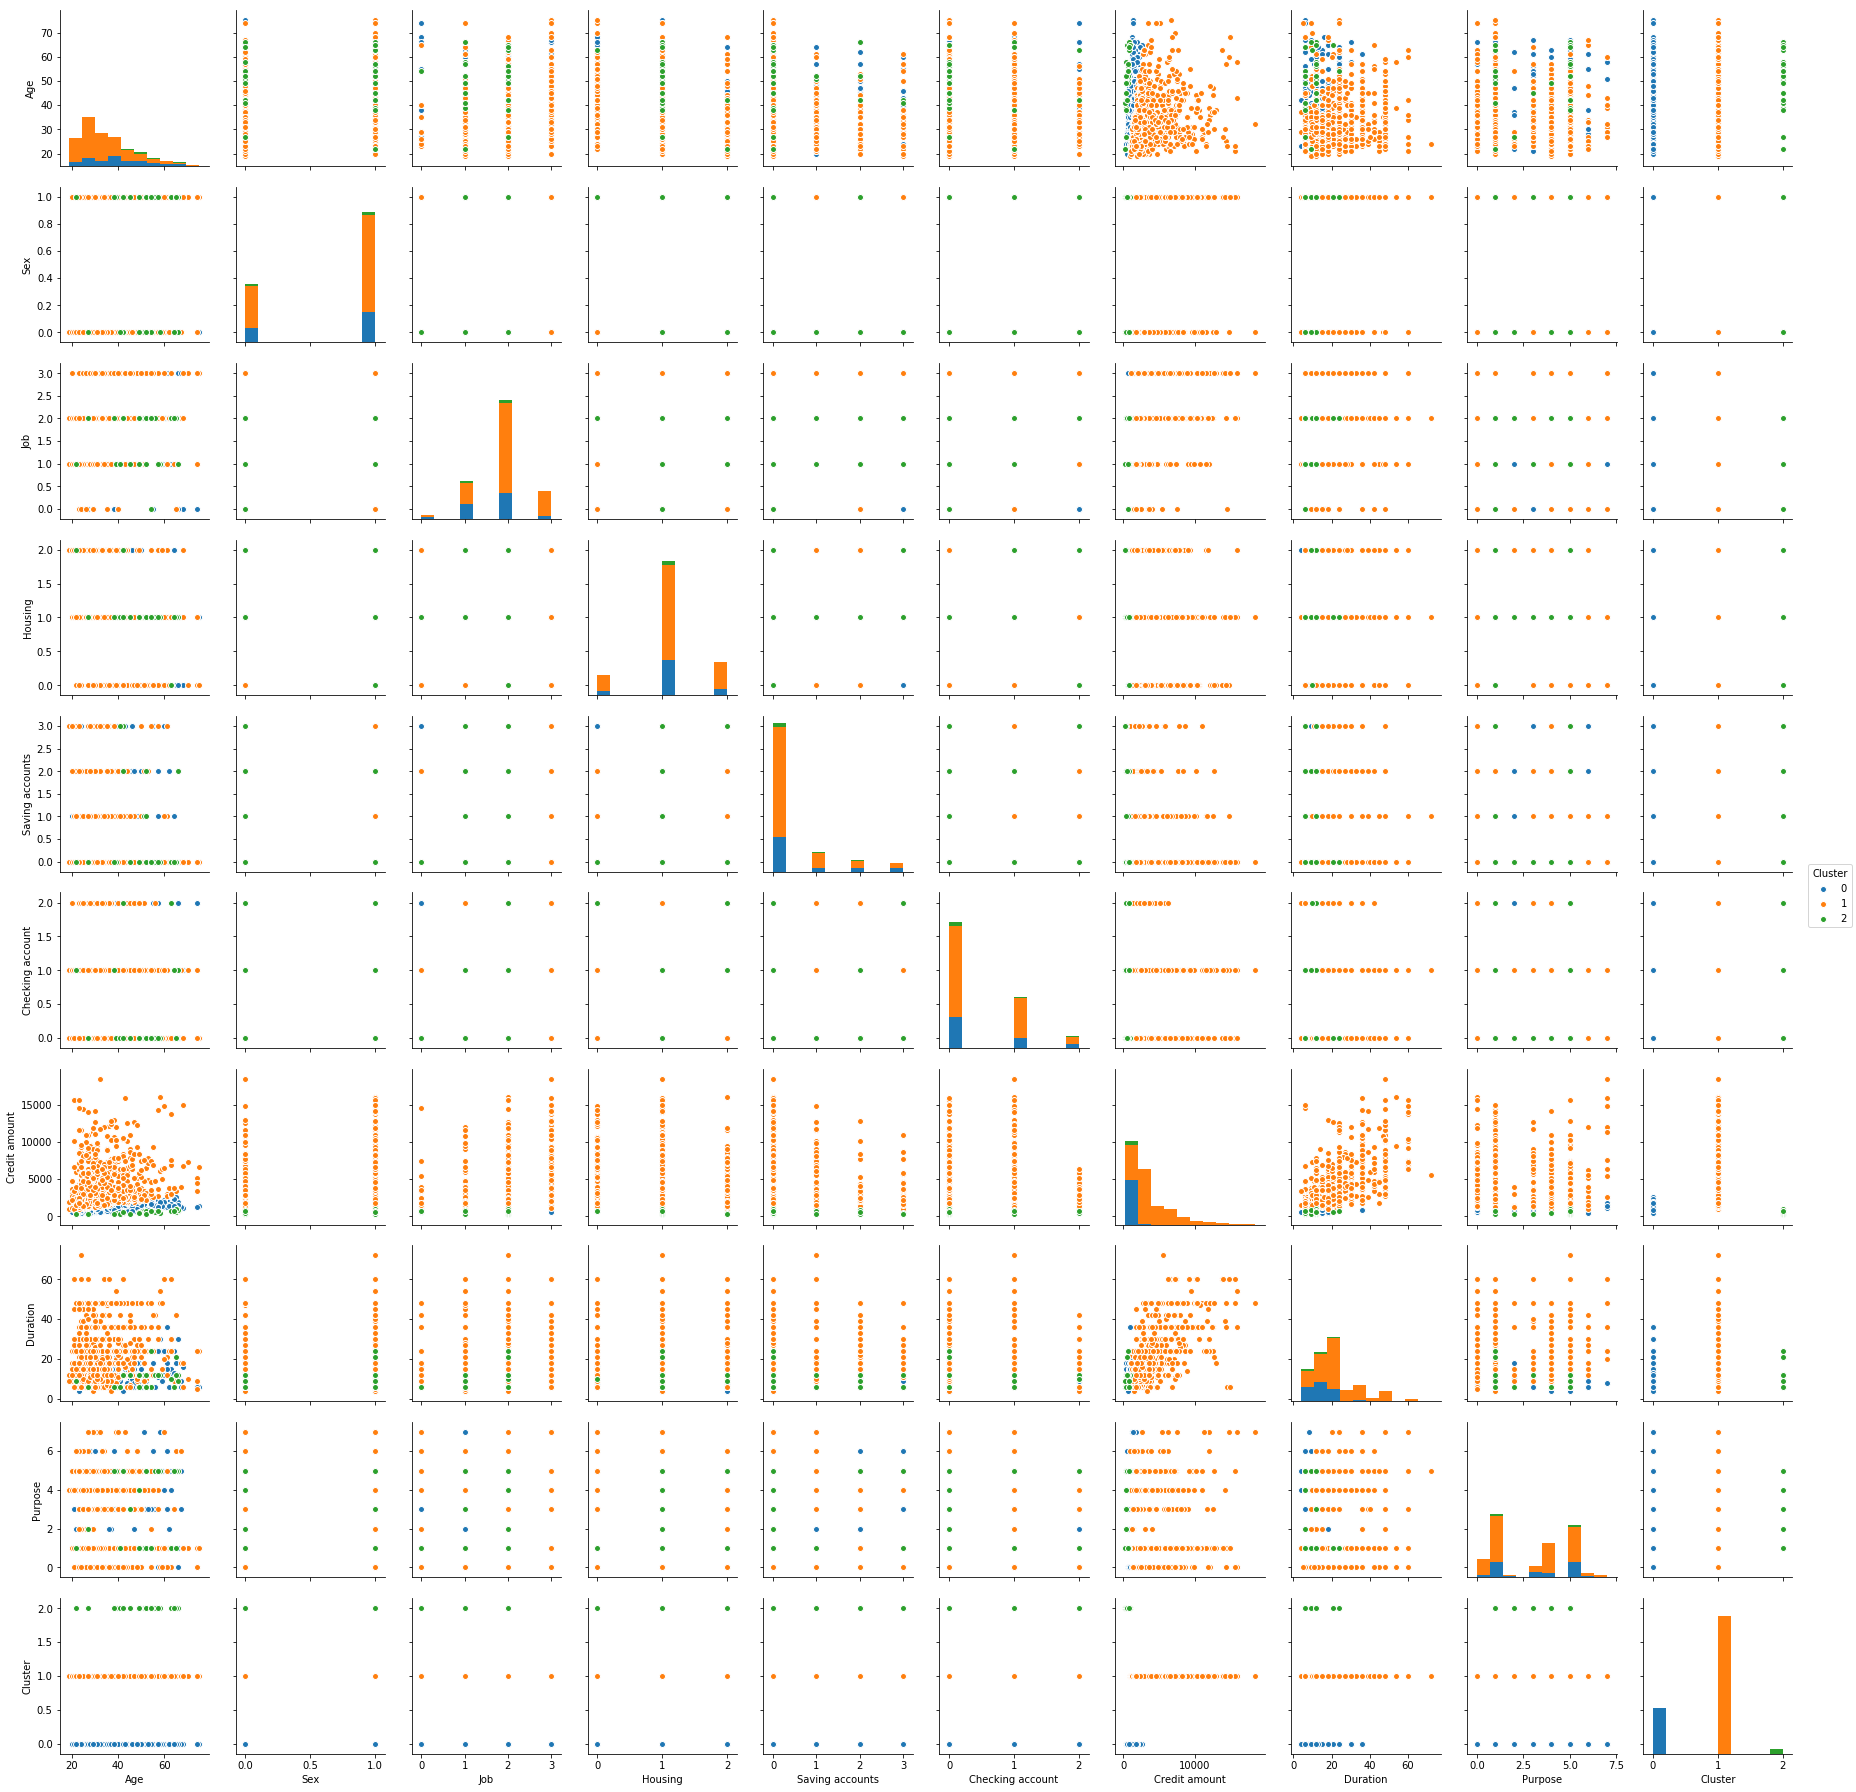

In [182]:
sns.pairplot((X3), hue='Cluster')

From the pairplots above, it can be seen that the variables that most influence the formation of customer segmentation clusters are 'Credit amount', 'Duration', and 'Age' because the relationship between these variables forms a pattern that can describe segmentation. <br>
From the scatter plot it can also be determined that:
1. Cluster = 0 represents ** low / good risk ** because it has a relatively low credit amount and duration
2. Cluster = 1 represents ** medium risk ** because it has a relatively balanced credit amount and duration
3. Cluster = 2 respresents ** high / bad risk ** because it has a high credit amount and duration

In [427]:
X4=datacredit.copy()
X4['Cluster']=kmeans.labels_
X4.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,0


In [430]:
X4["Cluster"] = np.where(X4["Cluster"]==0, "Good Risk",np.where(X4["Cluster"]==1, "Medium Risk", "High Risk"))
X4.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,Medium Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,Good Risk
2,49,male,1,own,little,little,2096,12,education,Good Risk
3,45,male,2,free,little,little,7882,42,furniture/equipment,Good Risk
4,53,male,2,free,little,little,4870,24,car,Good Risk


In [186]:
data_clustered = pd.DataFrame(X)
data_clustered['Cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('Cluster')
data_clustered = np.asarray(data_clustered)
data_clustered

array([[5.72192052e-02, 8.54017988e-04, 8.54017988e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.05785628e-02, 1.44510179e-03, 1.44510179e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.64662867e-02, 1.45865147e-03, 1.45865147e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.02103080e-01, 0.00000000e+00, 4.86205144e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.02699327e-01, 2.70261387e-03, 2.70261387e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [9.02278020e-02, 1.61121075e-03, 1.61121075e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00]])

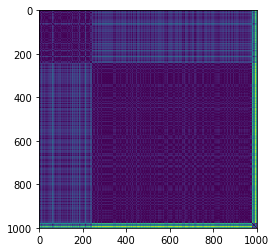

In [184]:
#Plotting similarity matrix
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

## 2. Hierarchial Clustering

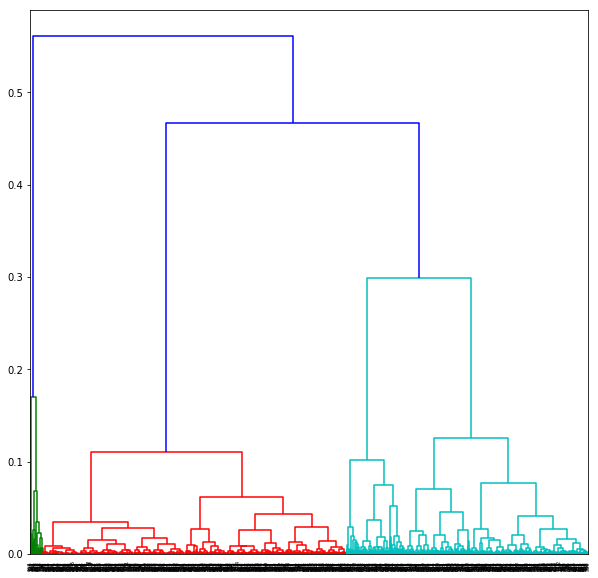

In [201]:
#Make dendogram with normalized variables and ward method
fig = plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

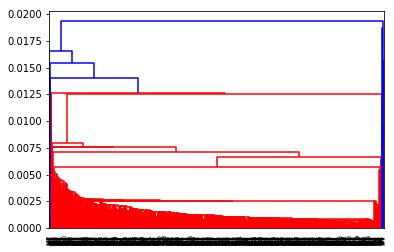

In [202]:
#Make different dendogram with normalized variables and single method
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

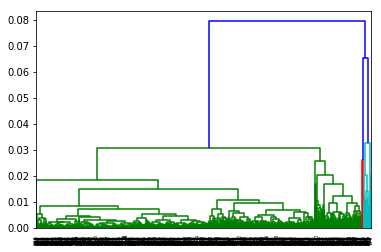

In [203]:
#Make different dendogram with normalized variables average method
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

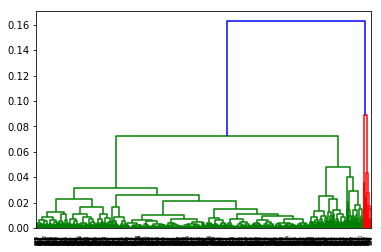

In [204]:
#Make different dendogram with normalized variables complete method
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

## Fitting Hierarchical Clustering Model

In [431]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', compute_full_tree=False)
model.fit(X)
labels = model.labels_
print(labels)

[0 2 0 2 2 2 0 2 0 2 0 2 2 0 0 0 0 2 2 2 0 2 0 0 2 0 1 1 2 2 0 2 2 0 0 2 2
 0 0 0 0 0 2 2 2 0 0 2 2 2 2 2 0 2 0 0 2 2 2 2 0 0 0 2 2 2 2 0 0 2 2 0 0 2
 0 0 2 2 2 2 2 0 0 0 0 0 0 2 2 0 1 0 0 2 0 2 0 2 0 2 0 2 0 0 2 2 2 2 2 0 0
 0 2 2 0 0 2 2 2 2 0 2 2 1 2 2 0 0 0 2 2 2 2 0 2 0 2 1 2 0 0 2 2 2 2 2 0 1
 2 0 0 0 2 2 2 2 0 1 2 2 2 0 0 2 0 2 0 2 2 0 0 0 0 0 2 2 2 1 2 1 2 2 0 2 0
 0 2 0 0 2 2 2 2 2 2 0 0 0 2 2 0 0 2 0 0 2 0 0 2 0 2 2 2 0 2 0 2 2 2 0 0 0
 0 2 2 2 2 2 2 2 2 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 0 2 0 2 0 0 0 2 0 2 0 2 0 2 2 2 2 2 0 2 0 2 0 0 0 2 2 2 2 0 0 0 2 2 2 2 2
 2 0 0 2 1 2 0 0 2 0 2 0 0 1 2 2 2 0 0 2 0 2 0 2 2 0 2 2 0 2 2 0 2 0 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 2 0 0 2 0 0 0 0 2 2 0 0 0 2 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 0 2 1 0 2 0 0 2 2 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 2 2 0 2 2 0
 0 2 0 2 2 0 0 0 2 2 2 2 0 2 2 0 0 2 2 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0
 2 0 0 2 0 0 2 0 2 2 2 2 2 2 1 2 2 0 2 0 0 0 0 2 2 2 2 0 0 0 0 2 2 2 0 0 2
 0 2 0 0 0 2 2 0 2 2 2 0 

## Visualizing Clustering Results

In [432]:
Y1=numerical.copy()
Y1['Cluster']=model.labels_
Y1.head()

,Credit amount,Duration,Age,Cluster
0,1169,6,67,0
1,5951,48,22,2
2,2096,12,49,0
3,7882,42,45,2
4,4870,24,53,2


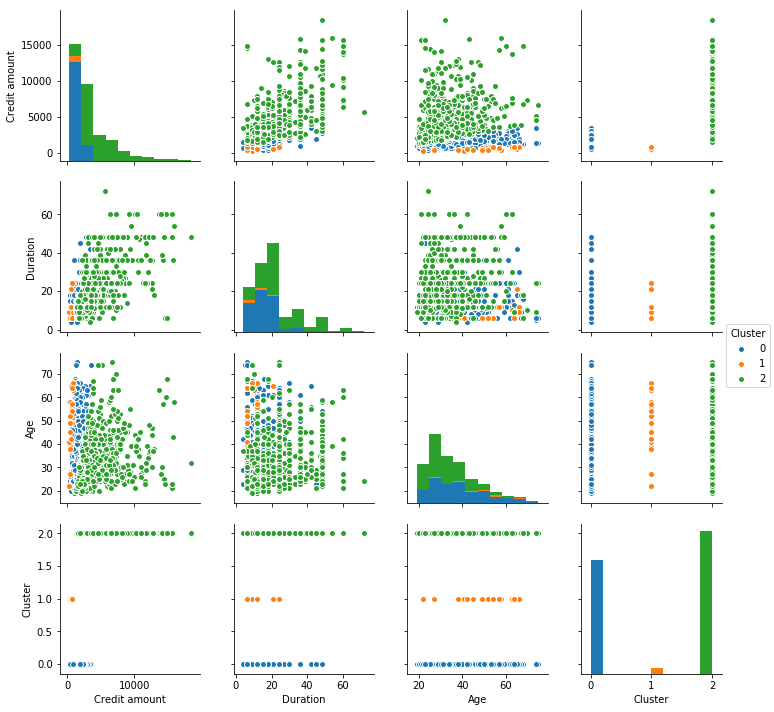

In [433]:
sns.pairplot((Y1), hue='Cluster')

In [434]:
Y2=categoricalencoder.copy()
Y2['Cluster']=model.labels_
Y2.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Cluster
0,1,2,1,0,0,5,0
1,0,2,1,0,1,5,2
2,1,1,1,0,0,3,0
3,1,2,0,0,0,4,2
4,1,2,0,0,0,1,2


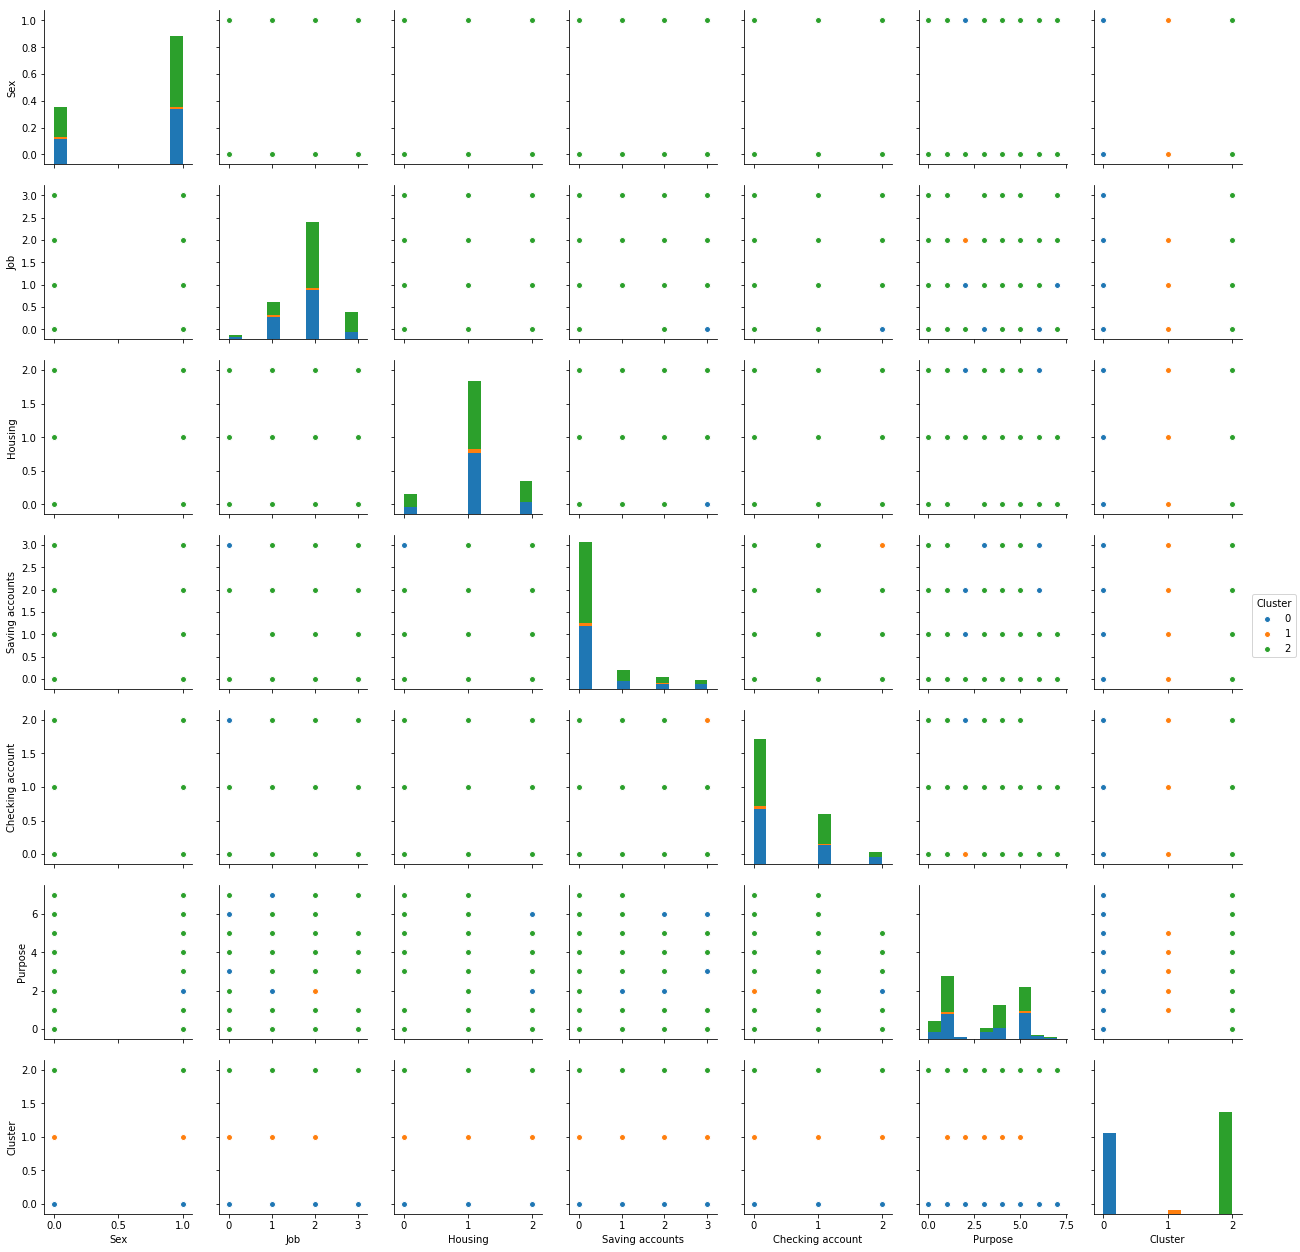

In [335]:
sns.pairplot((Y2), hue='Cluster')

## 3. DBSCAN

In [435]:
dbscan = DBSCAN(0.005, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [436]:
print(dbscan.labels_)

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0

In [437]:
Z1=numerical.copy()
Z1['Cluster']=dbscan.labels_
Z1.head()

,Credit amount,Duration,Age,Cluster
0,1169,6,67,-1
1,5951,48,22,0
2,2096,12,49,0
3,7882,42,45,0
4,4870,24,53,0


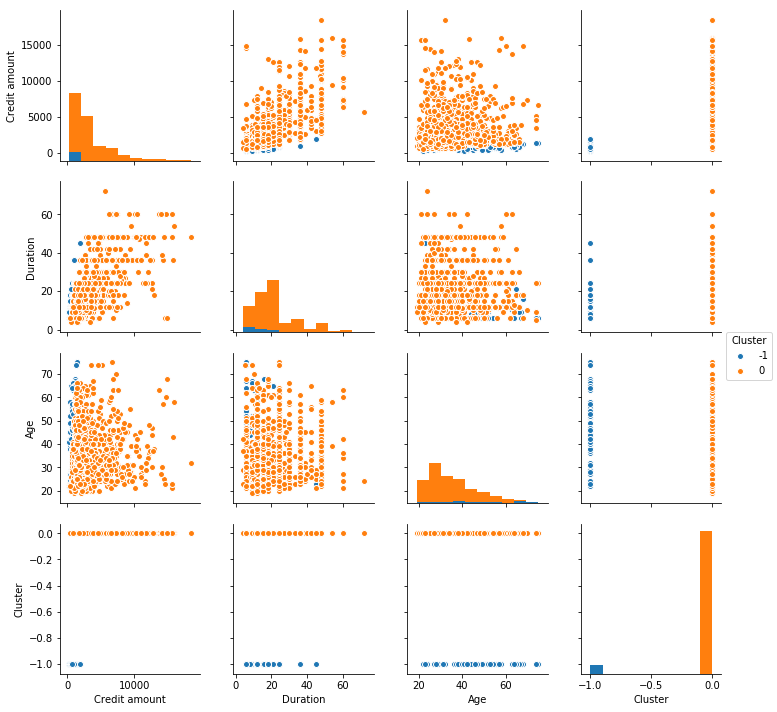

In [438]:
sns.pairplot((Z1), hue='Cluster')

In [344]:
Z2=categoricalencoder.copy()
Z2['Cluster']=dbscan.labels_
Z2.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Cluster
0,1,2,1,0,0,5,-1
1,0,2,1,0,1,5,0
2,1,1,1,0,0,3,0
3,1,2,0,0,0,4,0
4,1,2,0,0,0,1,0


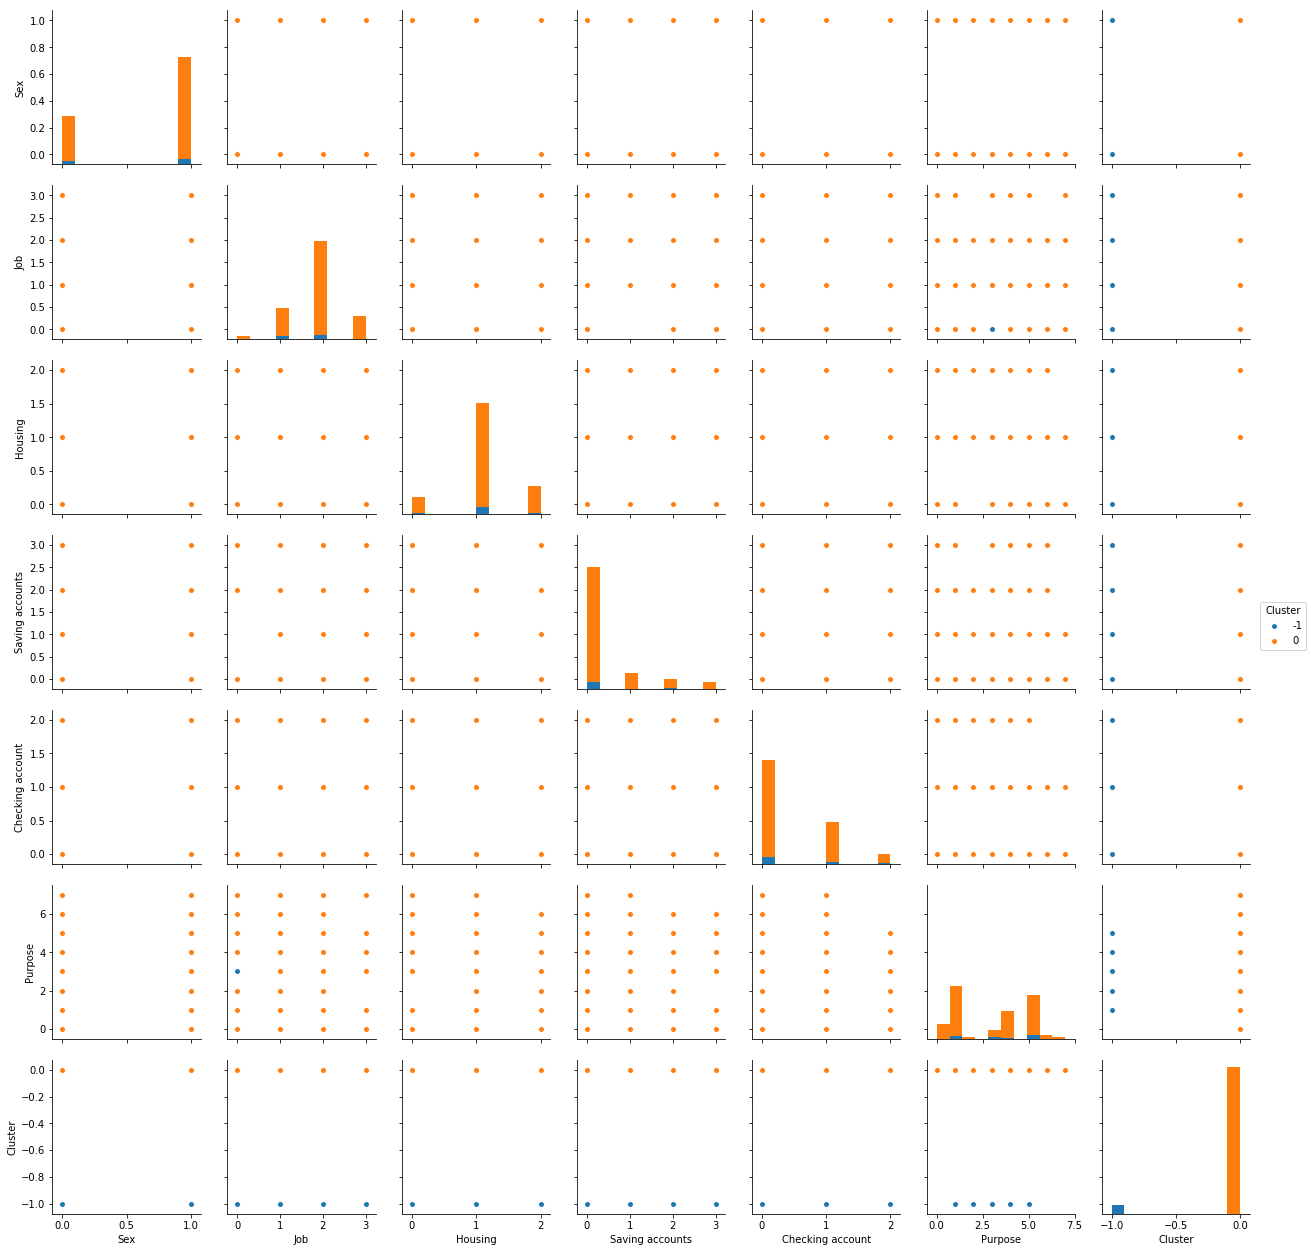

In [345]:
sns.pairplot((Z2), hue='Cluster')

# DECISION MAKING

Based on three clustering method, it can be concluded that the best clustering method is by **K-Means**.<br>
Because it can be seen that clustering with K-means implies and solving the problem by using statistical ways. And the most logical and required results of clustering in this modeling is K=3, eventhough hierarchial clustering also make 3 clustering, but it doesn't have significant statistical reasons.

From the visualization of clustering results, it can be seen that the variables that most influence the formation of customer segmentation clusters are 'Credit amount', 'Duration', and 'Age' because the relationship between these variables forms a pattern that can describe segmentation. <br>
From the scatter plot it can also be determined that:
1. Cluster = 0 represents ** low / good risk ** because it has a relatively low credit amount and duration
2. Cluster = 1 represents ** medium risk ** because it has a relatively balanced credit amount and duration
3. Cluster = 2 respresents ** high / bad risk ** because it has a high credit amount and duration

From those customer segmentation, it can give some business insight, such as:
1. For Customer in Good Risk, we have to keep by give some program that makes them more interest in our bank and give them extra treatment to keep having good risk segmentation.
2. For customer in Medium Risk, we have to give notification and give them program that will keep them for having high risks.
3. For customer in Bad Risk, we have to give attention and big notification to lower their risk and notifying about the sanction and the possibility of credit revocation.